In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [259]:
df = pd.read_csv('Data/housing_ca_cleaned.csv')

In [260]:
df.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'description', 'lat', 'long', 'state'],
      dtype='object')

In [261]:
df['desc_len'] = df['description'].apply(lambda x: len(x))

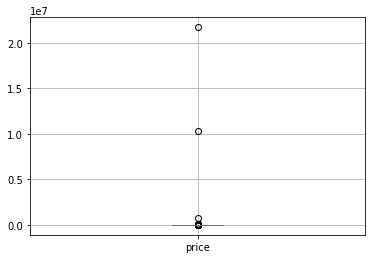

In [262]:
#Boxplot to determine whether it is needed to remove outliers
df.boxplot(column = ['price'])

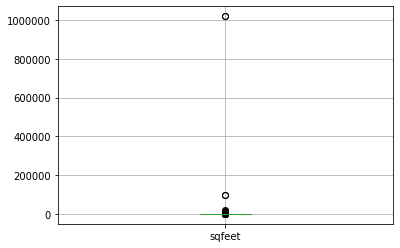

In [263]:
df.boxplot(column = ['sqfeet'])

In [264]:
#Remove outliers from possible variables
outlier_columns = ['price','sqfeet']
for i in range(0,2):
    for c in outlier_columns:
        df = df[((df[c] - df[c].mean()) / df[c].std()).abs() < 3]

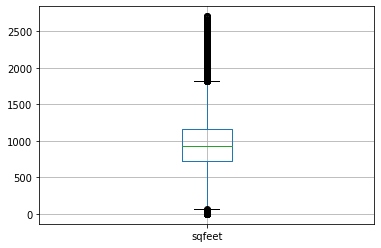

In [265]:
df.boxplot(column = ['sqfeet'])

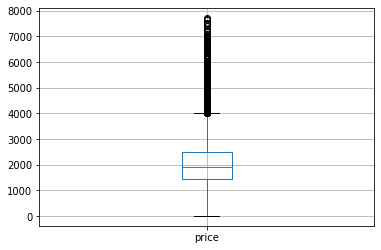

In [266]:
df.boxplot(column = ['price'])

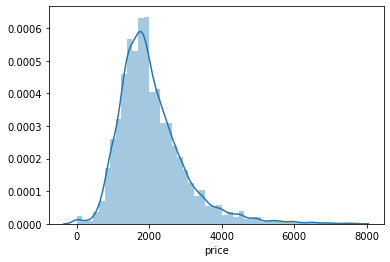

In [267]:
sns.distplot(df['price'])

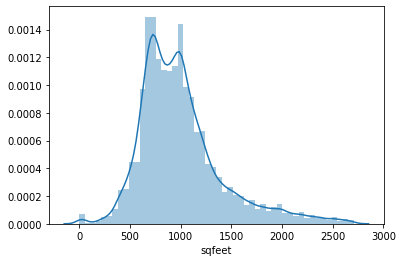

In [268]:
sns.distplot(df['sqfeet'])

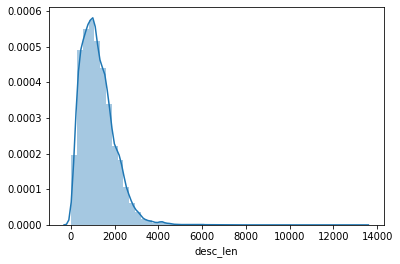

In [269]:
sns.distplot(df['desc_len'])

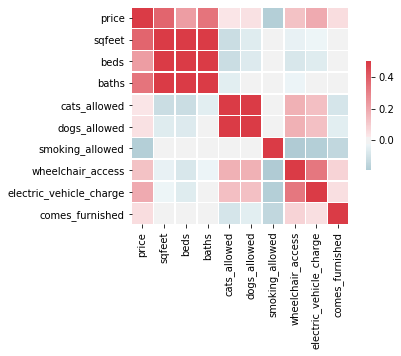

In [270]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['price', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished']].corr(),vmax = 0.5, center=0, cmap=cmap,square=True,
            linewidths=0.5, cbar_kws={"shrink": .5})

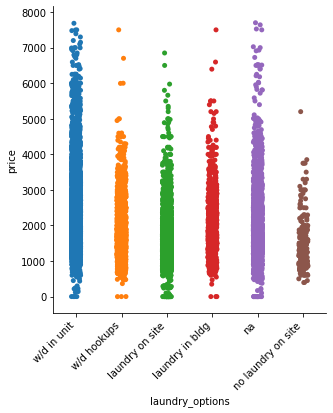

In [271]:
#Visualize distribution of price based on laundry options
chart = sns.catplot(x="laundry_options", y="price", data=df,height=5)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

[Text(0, 0, 'w/d in unit'),
 Text(0, 0, 'w/d hookups'),
 Text(0, 0, 'laundry on site'),
 Text(0, 0, 'laundry in bldg'),
 Text(0, 0, 'na'),
 Text(0, 0, 'no laundry on site')]

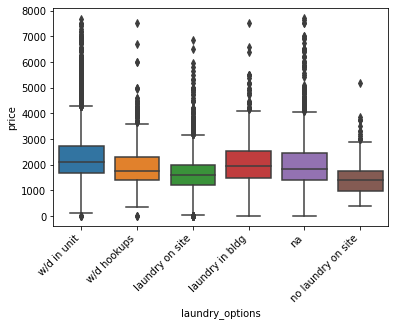

In [272]:
ax = sns.boxplot(x="laundry_options", y="price", data=df)
ax.set_xticklabels(labels=df['laundry_options'].unique(),rotation=45, horizontalalignment='right')

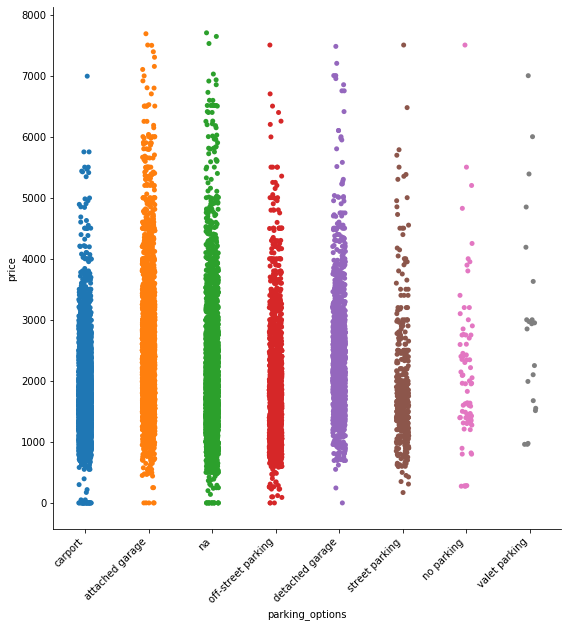

In [273]:
#Visualize distribution of price based on parking options
chart = sns.catplot(x="parking_options", y="price", data=df,height=8)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

[Text(0, 0, 'carport'),
 Text(0, 0, 'attached garage'),
 Text(0, 0, 'na'),
 Text(0, 0, 'off-street parking'),
 Text(0, 0, 'detached garage'),
 Text(0, 0, 'street parking'),
 Text(0, 0, 'no parking'),
 Text(0, 0, 'valet parking')]

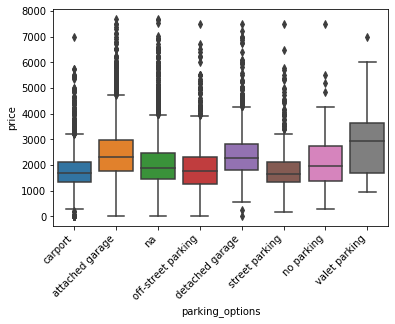

In [274]:
ax = sns.boxplot(x="parking_options", y="price", data=df)
ax.set_xticklabels(labels=df['parking_options'].unique(),rotation=45, horizontalalignment='right')

[Text(0, 0, 'apartment'),
 Text(0, 0, 'condo'),
 Text(0, 0, 'duplex'),
 Text(0, 0, 'house'),
 Text(0, 0, 'townhouse'),
 Text(0, 0, 'loft'),
 Text(0, 0, 'manufactured'),
 Text(0, 0, 'cottage/cabin'),
 Text(0, 0, 'flat'),
 Text(0, 0, 'in-law')]

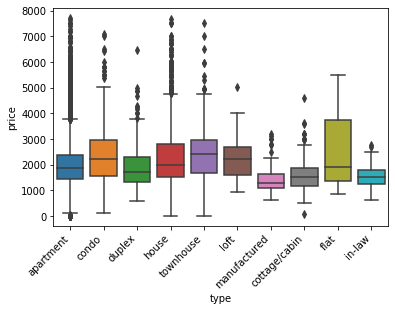

In [275]:
ax = sns.boxplot(x="type", y="price", data=df)
ax.set_xticklabels(labels=df['type'].unique(),rotation=45, horizontalalignment='right')

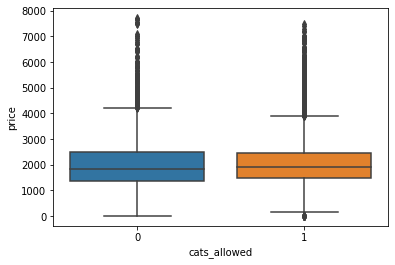

In [276]:
ax = sns.boxplot(x="cats_allowed", y="price", data=df)

In [277]:
df.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'description', 'lat', 'long', 'state', 'desc_len'],
      dtype='object')

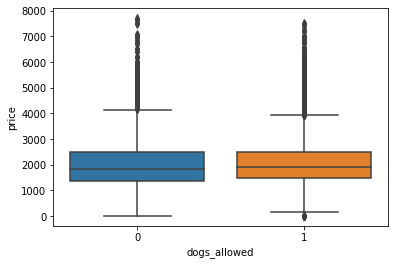

In [278]:
ax = sns.boxplot(x="dogs_allowed", y="price", data=df)

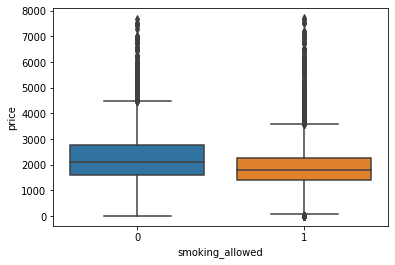

In [279]:
ax = sns.boxplot(x="smoking_allowed", y="price", data=df)

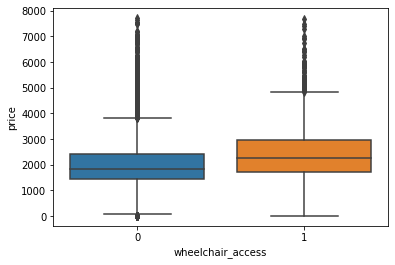

In [280]:
ax = sns.boxplot(x="wheelchair_access", y="price", data=df)

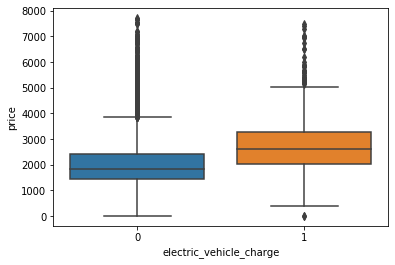

In [281]:
ax = sns.boxplot(x="electric_vehicle_charge", y="price", data=df)

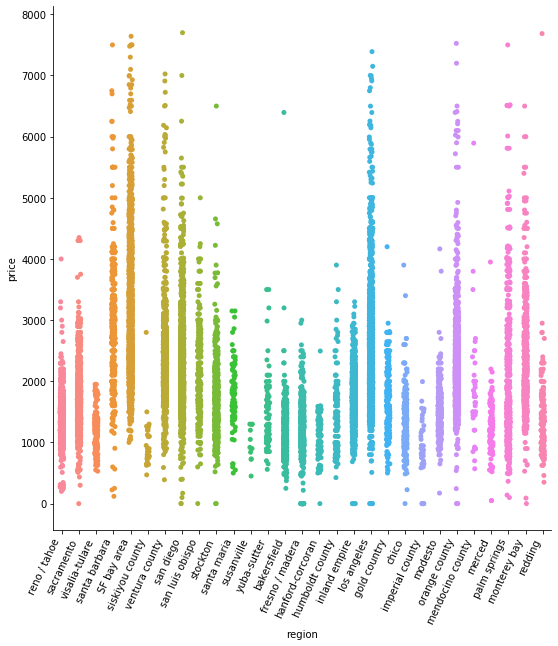

In [282]:
#Visualize distribution of price based on region
chart = sns.catplot(x="region", y="price", data=df,height=8)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

[Text(0, 0, 'reno / tahoe'),
 Text(0, 0, 'sacramento'),
 Text(0, 0, 'visalia-tulare'),
 Text(0, 0, 'santa barbara'),
 Text(0, 0, 'SF bay area'),
 Text(0, 0, 'siskiyou county'),
 Text(0, 0, 'ventura county'),
 Text(0, 0, 'san diego'),
 Text(0, 0, 'san luis obispo'),
 Text(0, 0, 'stockton'),
 Text(0, 0, 'santa maria'),
 Text(0, 0, 'susanville'),
 Text(0, 0, 'yuba-sutter'),
 Text(0, 0, 'bakersfield'),
 Text(0, 0, 'fresno / madera'),
 Text(0, 0, 'hanford-corcoran'),
 Text(0, 0, 'humboldt county'),
 Text(0, 0, 'inland empire'),
 Text(0, 0, 'los angeles'),
 Text(0, 0, 'gold country'),
 Text(0, 0, 'chico'),
 Text(0, 0, 'imperial county'),
 Text(0, 0, 'modesto'),
 Text(0, 0, 'orange county'),
 Text(0, 0, 'mendocino county'),
 Text(0, 0, 'merced'),
 Text(0, 0, 'palm springs'),
 Text(0, 0, 'monterey bay'),
 Text(0, 0, 'redding')]

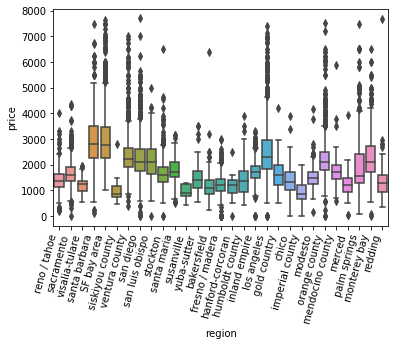

In [283]:
ax = sns.boxplot(x="region", y="price", data=df)
ax.set_xticklabels(labels=df['region'].unique(),rotation=75, horizontalalignment='right')

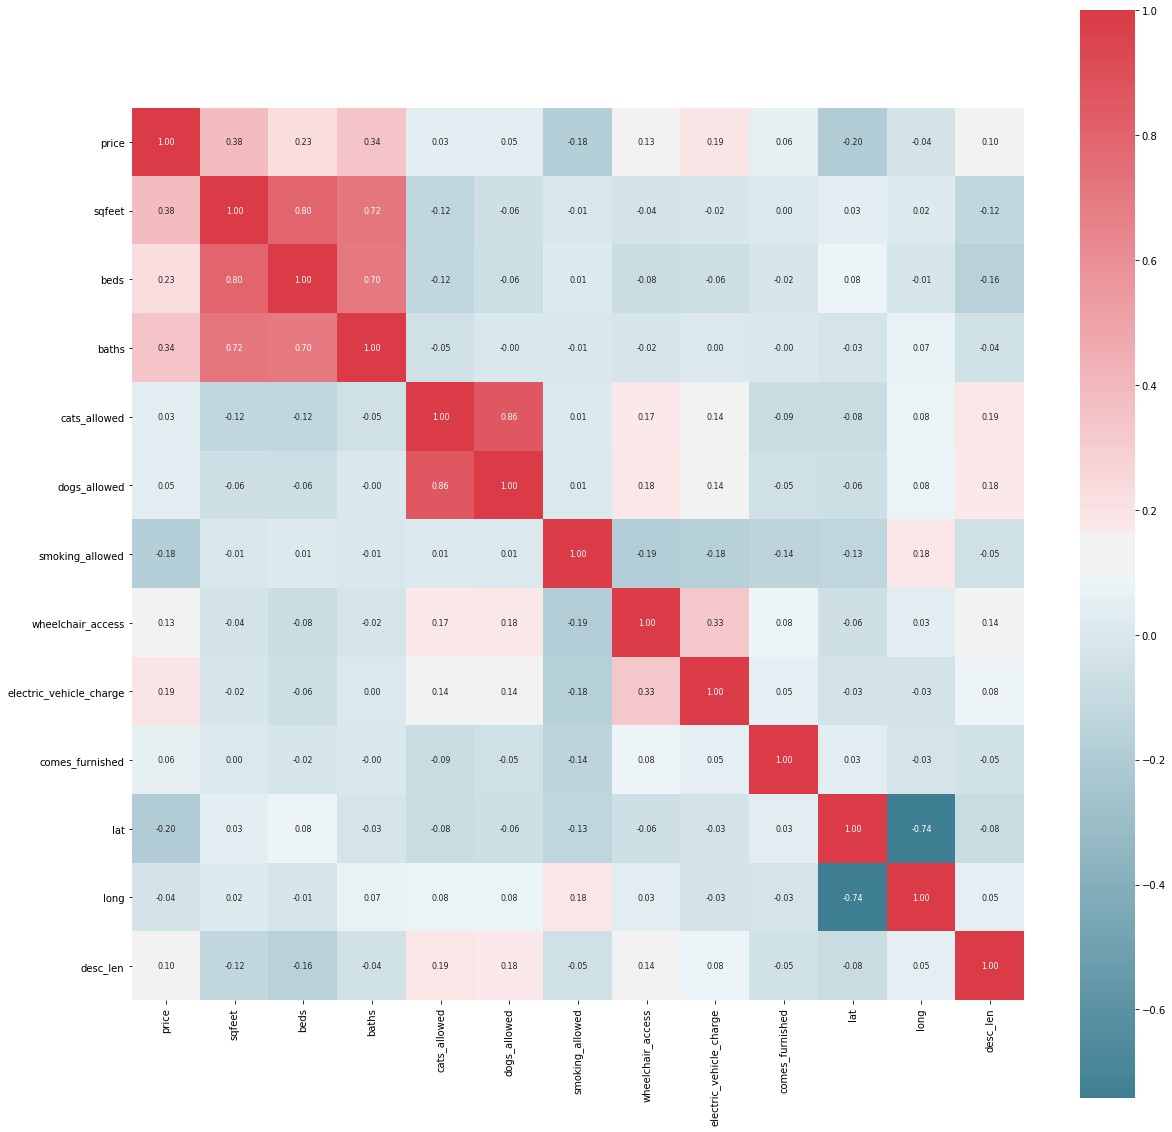

In [284]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, square= True,fmt='.2f', annot=True, annot_kws={'size':8}, cmap=cmap)

In [285]:
#Import stopwords to remove from description
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

In [286]:
#Create descriptions with and without stop words
df['desc_with_stopwords'] = df['description'].apply(lambda x: ' '.join([word for word in x.lower().split()]))
df['desc_without_stopwords'] = df['description'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop)]))

In [287]:
#Find the most common combinations of n words in order in the descriptions
def combine_words(desc,numWords):
    combined_desc = []
    for i in range(len(desc)-numWords+1):
        s = ''
        for j in range(numWords):
            s += desc[i+j] + " "
        combined_desc.append(s)
    return combined_desc

numWords = 3
df['desc_combined_words'] = df['desc_with_stopwords'].apply(lambda x: combine_words(x.split(),numWords))

splitString = '@&@'

temp_df = df['desc_combined_words'].apply(lambda x: splitString.join(x))

pd.Series(splitString.join(temp_df).lower().split(splitString)).value_counts()[50:100]

a 1 bedroom,                   742
contact info for               735
fitness center with            722
private patio or               721
contact info x                 720
to change without              714
in one of                      712
is subject to                  700
and three bedroom              694
to show contact                693
one and two                    681
- show contact                 679
us at show                     678
with easy access               671
washer & dryer                 664
for more information           663
monthly pet rent               645
central heat and               642
two bedroom apartment          641
shopping, dining, and          630
your new home                  629
call or text                   619
pricing and availability       614
now - show                     605
apartments for rent            600
info equal housing             596
contact info equal             594
one of our                     594
heat and air        

In [288]:
#Remove 
def remove_non_words(desc):
    desc = desc.lower().split()
    for s in desc:
        if(s.isnumeric() or not s.isalpha()):
            desc.remove(s)
    return ' '.join(desc)
df['desc_cleaned'] = df['desc_without_stopwords'].apply(lambda x: remove_non_words(x))

In [289]:
pd.Series(' '.join(df['desc_cleaned']).lower().split()).value_counts()[0:25]

contact       18010
apartment     17287
community     16270
info          14568
pet           10994
home          10583
apartments     9521
new            9298
-              9167
access         8993
bedroom        8957
fitness        8181
parking        8070
amenities      7899
center         7836
available      7638
living         7467
private        7423
located        7355
rent           6980
pool           6962
kitchen        6795
room           6429
features       6351
large          6297
dtype: int64

In [290]:
df.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'description', 'lat', 'long', 'state', 'desc_len',
       'desc_with_stopwords', 'desc_without_stopwords', 'desc_combined_words',
       'desc_cleaned'],
      dtype='object')

In [295]:
df_out = df[['price','region','type','sqfeet','beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options']]

In [299]:
df_out.to_csv('Data/eda_data_cleaned.csv',index = False)